In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/daniel/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv', index_col=None, na_values=['NA'])

In [4]:
data.shape

(1470, 35)

In [5]:
data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
239,32,Yes,Travel_Rarely,515,Research & Development,1,3,Life Sciences,1,331,...,4,80,0,4,2,1,3,2,1,2
1355,36,No,Travel_Rarely,335,Sales,17,2,Marketing,1,1908,...,3,80,2,12,1,1,4,2,1,3
335,40,No,Travel_Rarely,1124,Sales,1,2,Medical,1,453,...,3,80,3,6,2,2,4,3,0,2
287,38,No,Travel_Rarely,688,Research & Development,23,4,Life Sciences,1,393,...,2,80,1,10,2,3,2,2,1,2
748,26,Yes,Non-Travel,265,Sales,29,2,Medical,1,1037,...,4,80,0,7,6,3,2,2,2,2
643,42,No,Travel_Rarely,1265,Research & Development,3,3,Life Sciences,1,894,...,2,80,1,17,1,2,5,3,1,3
624,53,No,Travel_Rarely,661,Sales,7,2,Marketing,1,862,...,4,80,1,35,3,3,5,2,0,4
1080,46,No,Travel_Rarely,228,Sales,3,3,Life Sciences,1,1527,...,4,80,1,23,2,4,13,12,5,1
161,27,No,Non-Travel,691,Research & Development,9,3,Medical,1,218,...,4,80,1,6,1,1,2,2,2,2
865,30,No,Travel_Rarely,1329,Sales,29,4,Life Sciences,1,1211,...,3,80,3,8,3,3,4,3,0,3


In [6]:
data = data.drop('EmployeeNumber', axis = 1)
data = data.drop('EmployeeCount', axis = 1)
data = data.drop('StandardHours', axis = 1)
data = data.drop('Over18', axis = 1)

In [7]:
data.isnull().sum()
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [8]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [9]:
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

In [10]:
data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})

In [11]:
data['Department'] = data['Department'].map({'Research & Development': 0, 'Human Resources': 1, 'Sales':2})

In [12]:
data['EducationField'] = data['EducationField'].map({'Life Sciences': 0, 'Medical': 1, 'Marketing':2, 'Technical Degree':3, 'Human Resources':4, 'Other':5})

In [13]:
data['MaritalStatus'] = data['MaritalStatus'].map({'Single': 0, 'Divorced': 1, 'Married':2})

In [14]:
data['OverTime'] = data['OverTime'].map({'No': 0, 'Yes': 1})

In [15]:
data['JobRole'] = data['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician':2, 'Manufacturing Director':3, 'Healthcare Representative':4, 'Research Director':5, 'Manager':6, 'Sales Representative':7,'Human Resources':8})

In [16]:
data.corr()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,-0.023179,-0.001686,0.208034,-0.035850,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.085118,0.077924,-0.031373,0.051567,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.004909,-0.009696,-0.008670,-0.015275,-0.011310,-0.044896,...,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.009565,-0.004985,-0.016806,-0.018291,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.023179,0.085118,-0.004909,-0.009565,1.000000,0.011316,0.016844,0.114221,-0.027459,-0.024323,...,-0.032669,-0.002890,-0.016746,-0.013214,0.015977,0.062248,0.031762,0.038258,0.028365,0.021591
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,0.011316,1.000000,0.021042,0.005369,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,0.016844,0.021042,1.000000,0.033467,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.035850,0.051567,-0.015275,-0.018291,0.114221,0.005369,0.033467,1.000000,0.061149,0.017465,...,-0.014649,-0.000440,-0.020446,-0.027703,-0.005588,0.047322,-0.022710,-0.015588,-0.029528,-0.010316
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,-0.027459,-0.016075,-0.027128,0.061149,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.044896,-0.011716,-0.024323,-0.001851,-0.016547,0.017465,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [17]:
fdata = data[['Attrition','Age','OverTime','JobLevel','MaritalStatus','MonthlyIncome','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']].copy()

In [18]:
fdata.head()


,Attrition,Age,OverTime,JobLevel,MaritalStatus,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,41,1,2,0,5993,0,8,6,4,5
1,0,49,0,2,2,5130,1,10,10,7,7
2,1,37,1,1,0,2090,0,7,0,0,0
3,0,33,1,1,2,2909,0,8,8,7,0
4,0,27,0,1,2,3468,1,6,2,2,2


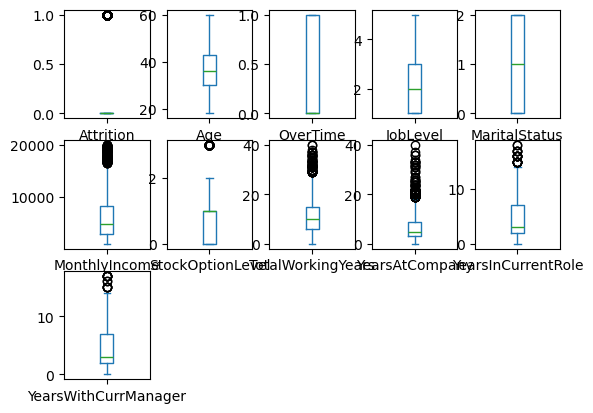

In [19]:
fdata.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

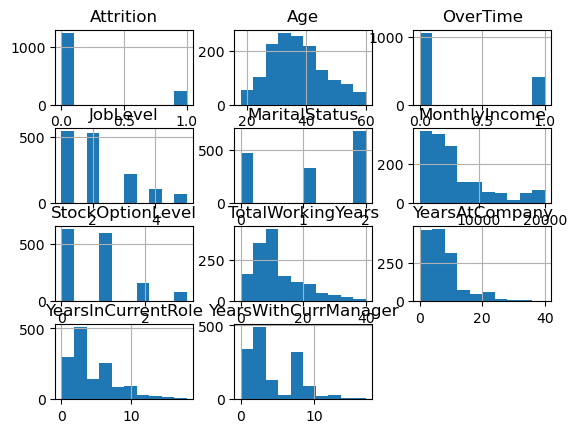

In [20]:
fdata.hist()
plt.show()

### Classification

In [21]:
array = fdata.values
print(array)

[[ 1 41  1 ...  6  4  5]
 [ 0 49  0 ... 10  7  7]
 [ 1 37  1 ...  0  0  0]
 ...
 [ 0 27  1 ...  6  2  3]
 [ 0 49  0 ...  9  6  8]
 [ 0 34  0 ...  4  3  2]]


In [22]:
X, y = array[:, 1:], array[:, 0]

In [23]:
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])

In [24]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=141)

In [25]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
import graphviz
gr_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=fdata.columns[:10], class_names = True,        
                         filled=True, rounded=True, proportion = False, special_characters=True)  
dtree = graphviz.Source(gr_data) 

In [27]:
dtree.render("atrition")

'atrition.pdf'

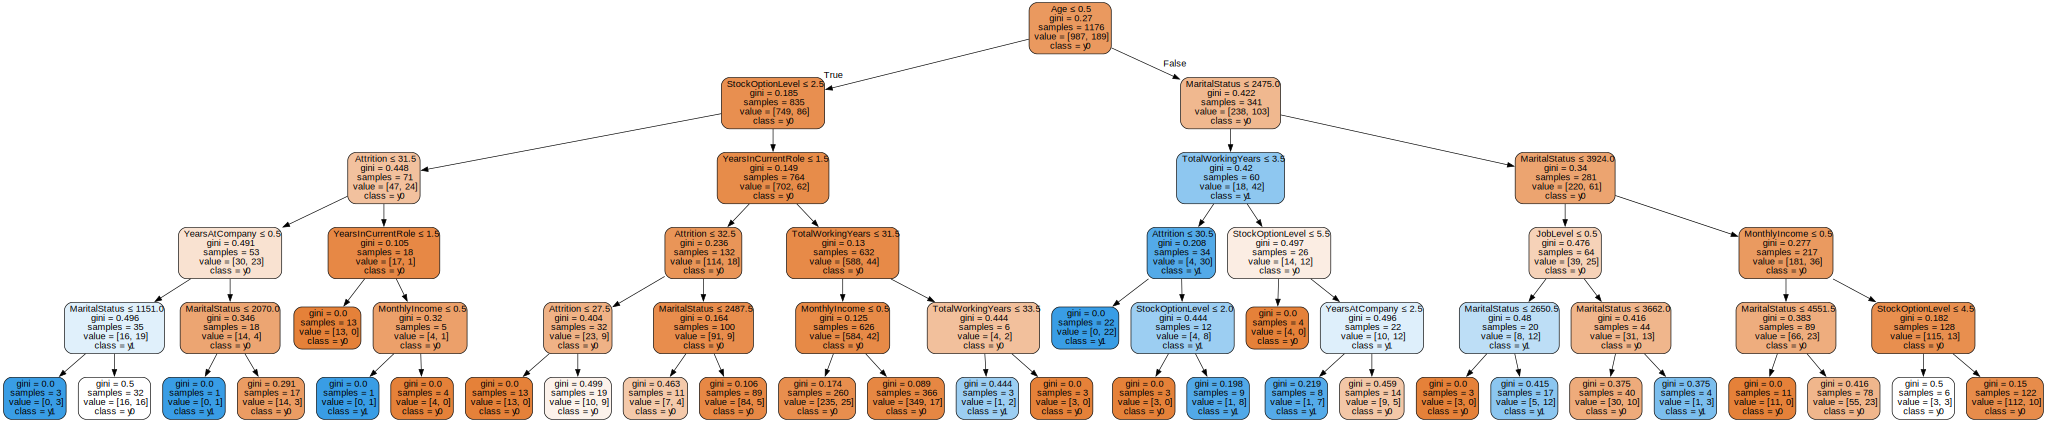

In [28]:
dtree

### Testing the model

In [29]:
y_testp = classifier.predict(X_test)
y_testp

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [30]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.826530612244898


### Naive Bayes method

In [32]:
print('Number of rows in the total set: {}'.format(fdata.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1470
Number of rows in the training set: 1176
Number of rows in the test set: 294


In [37]:
from sklearn.naive_bayes import MultinomialNB
myNB = MultinomialNB()
myNB.fit(X_train, y_train)

MultinomialNB()

In [38]:
predictions = myNB.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.6020408163265306
Precision score:  0.20512820512820512
Recall score:  0.5
F1 score:  0.29090909090909095


### Recomendation
we would recomend The first model